In [1]:
!wget https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0
!unzip train.zip?dl=0

--2025-04-25 05:10:34--  https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.13.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.13.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/qtcrzmsv4jz47cgvr2t0u/train.zip?rlkey=x3sz1h2o797inkqer67q7dg6b&dl=0 [following]
--2025-04-25 05:10:34--  https://www.dropbox.com/scl/fi/qtcrzmsv4jz47cgvr2t0u/train.zip?rlkey=x3sz1h2o797inkqer67q7dg6b&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc44108959fbb7421a3c51504e19.dl.dropboxusercontent.com/cd/0/inline/CofrP-buKdEhaet2dYUhcFdesaiQbuLf6xJiRZZniCIkf0uk9f1YL5miDjuu4Ldzi0beHmbJ4b5gsyi2adn6rxFfEnxdCq8RWquT5SS3gyO_EmZoOO3sSQ0CH85ztJ18RzJBkHV5qSb2AWOQWF4Io7st/file# [following]
--2025-04-25 05:10:35--  https://uc44108959fbb7421a3c51504e19.dl.dropboxusercontent.com/cd/0

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # fixed typo from `pit` to `plt`

from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense  # fixed space typo in 'layers'
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.losses import categorical_crossentropy


In [3]:
# Working with pre trained model

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [5]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [6]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/train",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )


Found 350 images belonging to 7 classes.


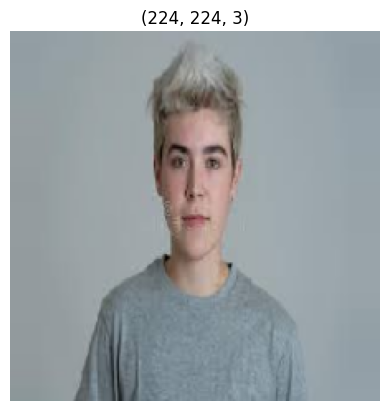

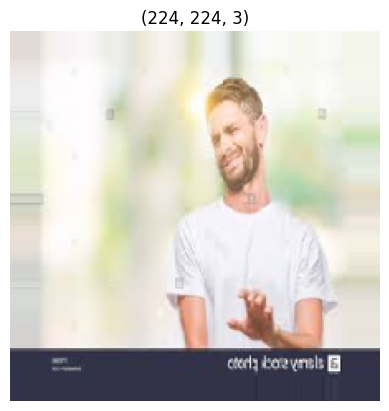

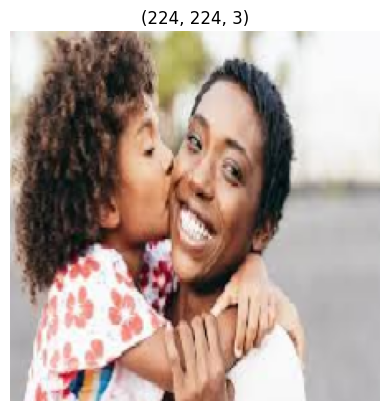

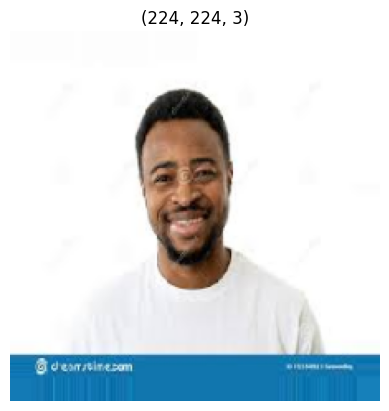

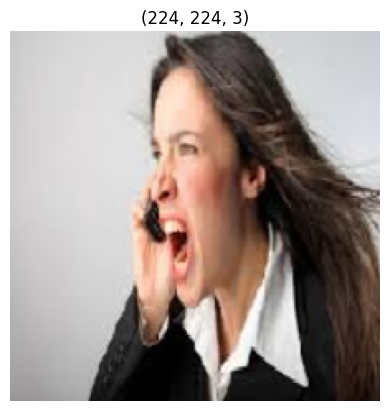

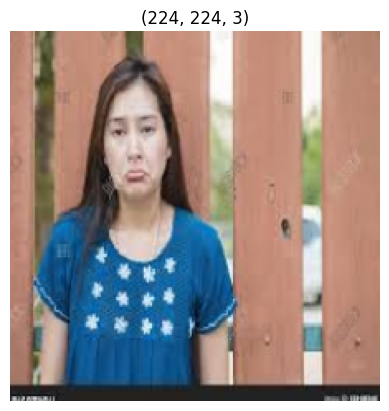

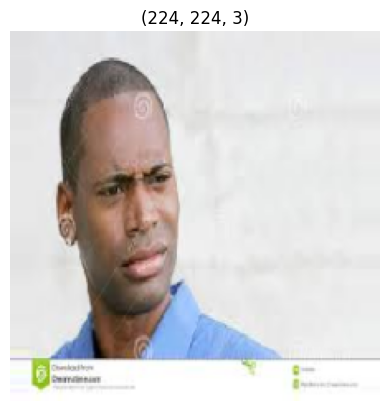

In [7]:
# Get one batch of images and labels from the data generator
t_img, label = next(train_data)

# Function to plot images
def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """
  count = 0
  for im, l in zip(img_arr, label):
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis('off')
    plt.show()

    count += 1
    if count == 10:
      break

# Call the function to plot images
plotImages(t_img, label)


In [8]:
## having early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list
call_back = [es, mc]

In [10]:
hist = model.fit(
    train_data,
    steps_per_epoch=10,
    epochs=30,
    validation_data=val_data,
    validation_steps=8,
    callbacks=[es, mc]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 737ms/step - accuracy: 0.2195 - loss: 7.4623
Epoch 1: val_accuracy improved from -inf to 0.64453, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.2265 - loss: 7.6226 - val_accuracy: 0.6445 - val_loss: 1.9622
Epoch 2/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5312 - loss: 3.1301

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy did not improve from 0.64453
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5312 - loss: 3.1301 - val_accuracy: 0.5703 - val_loss: 2.7421
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.6062 - loss: 2.6347
Epoch 3: val_accuracy improved from 0.64453 to 0.71875, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.6071 - loss: 2.6175 - val_accuracy: 0.7188 - val_loss: 1.3646
Epoch 4/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6562 - loss: 2.3283
Epoch 4: val_accuracy improved from 0.71875 to 0.75391, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.6562 - loss: 2.3283 - val_accuracy: 0.7539 - val_loss: 1.0694
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.7281 - loss: 1.4647
Epoch 5: val_accuracy improved from 0.75391 to 0.92969, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 484ms/step - accuracy: 0.7299 - loss: 1.4489 - val_accuracy: 0.9297 - val_loss: 0.3094
Epoch 6/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9688 - loss: 0.0877
Epoch 6: val_accuracy did not improve from 0.92969
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9688 - loss: 0.0877 - val_accuracy: 0.9023 - val_loss: 0.5070
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.8734 - loss: 0.5935
Epoch 7: val_accuracy did not improve from 0.92969
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 392ms/step - accuracy: 0.8749 - loss: 0.5825 - val_accuracy: 0.9258 - val_loss: 0.2921
Epoch 8/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.9375 - loss: 0.1355
Epoch 8: val_accuracy did not improve from 0.92969
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9375 - loss: 0.1355 - val_accuracy: 0.8945 - val_loss: 0.4080
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.9097 - loss: 0.4404
Epoch 9: val_accuracy improved from 0.

10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 548ms/step - accuracy: 0.9108 - loss: 0.4336 - val_accuracy: 0.9414 - val_loss: 0.2360
Epoch 10/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8438 - loss: 0.5486
Epoch 10: val_accuracy improved from 0.94141 to 0.96094, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.8438 - loss: 0.5486 - val_accuracy: 0.9609 - val_loss: 0.2002
Epoch 11/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.9611 - loss: 0.2092
Epoch 11: val_accuracy did not improve from 0.96094
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 394ms/step - accuracy: 0.9595 - loss: 0.2163 - val_accuracy: 0.9453 - val_loss: 0.1819
Epoch 12/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.7812 - loss: 1.1234
Epoch 12: val_accuracy did not improve from 0.96094
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7812 - loss: 1.1234 - val_accuracy: 0.9531 - val_loss: 0.2197
Epoch 13/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.9401 - loss: 0.1989
Epoch 13: val_accuracy improved from 0.96094 to 0.96875, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9404 - loss: 0.2002 - val_accuracy: 0.9688 - val_loss: 0.1286
Epoch 14/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9062 - loss: 0.7521
Epoch 14: val_accuracy improved from 0.96875 to 0.97266, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.9062 - loss: 0.7521 - val_accuracy: 0.9727 - val_loss: 0.1144
Epoch 15/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.9649 - loss: 0.2095
Epoch 15: val_accuracy improved from 0.97266 to 0.98047, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 545ms/step - accuracy: 0.9655 - loss: 0.2052 - val_accuracy: 0.9805 - val_loss: 0.0622
Epoch 16/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9062 - loss: 0.6450
Epoch 16: val_accuracy improved from 0.98047 to 0.98828, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.9062 - loss: 0.6450 - val_accuracy: 0.9883 - val_loss: 0.0362
Epoch 17/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.9681 - loss: 0.0958
Epoch 17: val_accuracy improved from 0.98828 to 0.99609, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 430ms/step - accuracy: 0.9687 - loss: 0.0942 - val_accuracy: 0.9961 - val_loss: 0.0108
Epoch 18/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 8.4408e-04
Epoch 18: val_accuracy did not improve from 0.99609
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 8.4408e-04 - val_accuracy: 0.9922 - val_loss: 0.0179
Epoch 19/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - accuracy: 0.9794 - loss: 0.0506
Epoch 19: val_accuracy did not improve from 0.99609
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 508ms/step - accuracy: 0.9793 - loss: 0.0516 - val_accuracy: 0.9883 - val_loss: 0.0197
Epoch 20/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9688 - loss: 0.0873
Epoch 20: val_accuracy did not improve from 0.99609
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9688 - loss: 0.0873 - val_accuracy: 0.9883 - val_loss: 0.0208
Epoch 21/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - accuracy: 0.9985 - loss: 0.0088
Epoch 21: val_accuracy d

In [11]:
# Loading the best fit model
from keras.models import load_model
model = load_model("/content/best_model.h5")


In [12]:
h =  hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

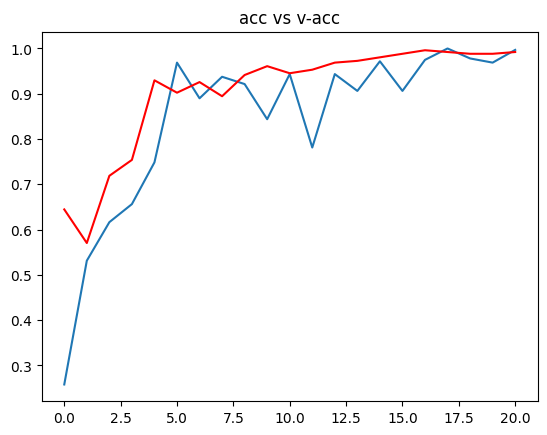

In [13]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

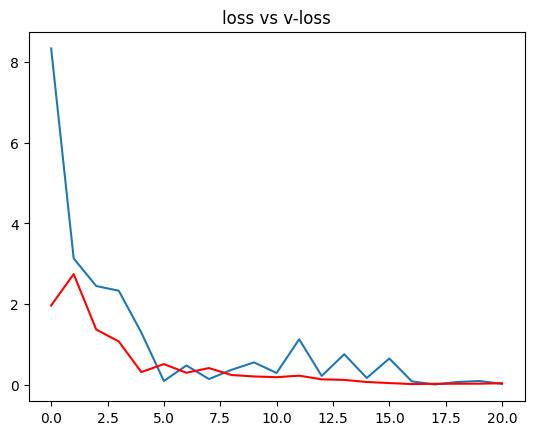

In [14]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [15]:
# just to map o/p values
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

In [18]:
# path for the image to see if it predics correct class

path = "/content/sad.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
 the image is of Sad


In [19]:
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten,
                                     Dense, Dropout, BatchNormalization)
 model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(48,48,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,422,087 (5.42 MB)

 Trainable params: 1,421,191 (5.42 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
#this is another example algorithm VGG16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D
import tensorflow as tf

# 1. Prepare the input shape
input_shape = (48, 48, 3)  # VGG16 expects 3 channels

# 2. Convert grayscale to 3 channels (if your images are grayscale)
# Either modify your data pipeline or use a lambda layer if you're loading grayscale

# 3. Load VGG16 without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# 4. Freeze the base model layers (optional)
for layer in base_model.layers:
    layer.trainable = False

# 5. Add custom layers on top
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)

# 6. Build the model
model = Model(inputs=base_model.input, outputs=predictions)

# 7. Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,815 (56.64 MB)

 Trainable params: 133,127 (520.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)